In [2]:
import pandas as pd

# imports for sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
sns.set_style("whitegrid")

In [4]:
def load_text_dataset_pandas(dataset_path):
    """This function loads CSV datasets using the read_csv method of the pandas library.
    The CSV is epxected to be comma-separated, while separate examples are separated by new line.
    First entry is expected to be text, second entry is parsed as classification label."""
    df = pd.read_csv(dataset_path)
    
    print(df.head())

    X = df.iloc[:, 0].to_numpy()
    y = df.iloc[:, 1].to_numpy()

    return X, y

In [5]:
def vectorize_text(X_train, X_test):
    # train tf-idf vectorizer
        # HINT: On which data sets should the IDF be calculated
        # to prevent data leakage?
    # transform X_train
    # transform X_test
    # return them

    return V_train, V_test

#### 20newsgroups dataset - multiclass classification

                                                text                    target
0  From: Mamatha Devineni Ratnam <mr47+@andrew.cm...          rec.sport.hockey
1  From: mblawson@midway.ecn.uoknor.edu (Matthew ...  comp.sys.ibm.pc.hardware
2  From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...     talk.politics.mideast
3  From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...  comp.sys.ibm.pc.hardware
4  From: Alexander Samuel McDiarmid <am2o+@andrew...     comp.sys.mac.hardware
0.8623342175066313


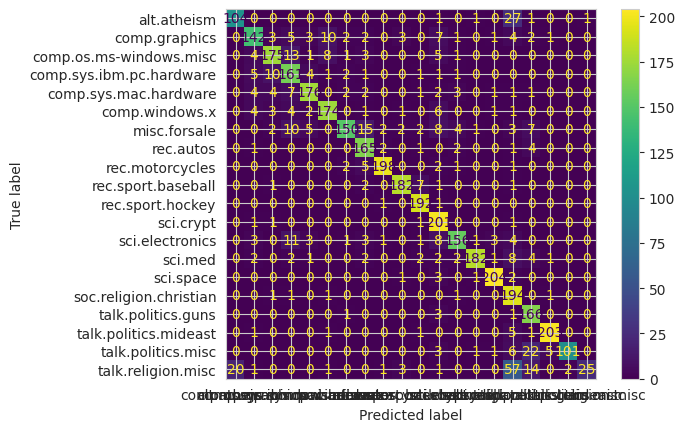

In [6]:
# load news group dataset
X, y = load_text_dataset_pandas('./20newsgroups.csv')
# split data in accordance to exercise
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

# vectorize data
tf_vectorizer = TfidfVectorizer()
X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)
# train classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tf, y_train)
y_pred = naive_bayes_classifier.predict(X_test_tf)
# build confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
# find accuracy
print(accuracy_score(y_test, y_pred))

#### Spam - No spam

In [42]:
# same procedure as in 20news groups dataset
X, y = load_text_dataset_pandas('./spam_or_not_spam.csv')
# split data in accordance to exercise
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

# vectorize data
tf_vectorizer = TfidfVectorizer()
X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)
# train classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tf, y_train)
y_pred = naive_bayes_classifier.predict(X_test_tf)
# build confusion matrix
# find accuracy, precision, recall, f1-score PER CLASS
print(accuracy_score(y_test, y_pred))
precision_spam = precision_score(y_test, y_pred, pos_label='Spam')
recall_spam = recall_score(y_test, y_pred, pos_label='Spam')
f1_spam = f1_score(y_test, y_pred, pos_label='Spam')
print(precision_spam, recall_spam, f1_spam)

precision_not_spam = precision_score(y_test, y_pred, pos_label='Not spam')
recall_not_spam = recall_score(y_test, y_pred, pos_label='Not spam')
f1_not_spam = f1_score(y_test, y_pred, pos_label='Not spam')
print(precision_not_spam, recall_not_spam, f1_not_spam)
      

                                               email     label
0   date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...  Not spam
1  martin a posted tassos papadopoulos the greek ...  Not spam
2  man threatens explosion in moscow thursday aug...  Not spam
3  klez the virus that won t die already the most...  Not spam
4   in adding cream to spaghetti carbonara which ...  Not spam
0.8683333333333333
1.0 0.18556701030927836 0.3130434782608696
0.8642611683848798 1.0 0.9271889400921659
